In [ ]:
# Importing relevant libraries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers, activations, callbacks
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
import numpy as np

In [ ]:
# Loading the CIFAR-10 dataset
(X_train, y_train),( X_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
# Data pre-processing
X_train, X_test = X_train/255 , X_test/255

In [ ]:
# Setting up the Simple CNN model

model = Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape= X_train[0].shape))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

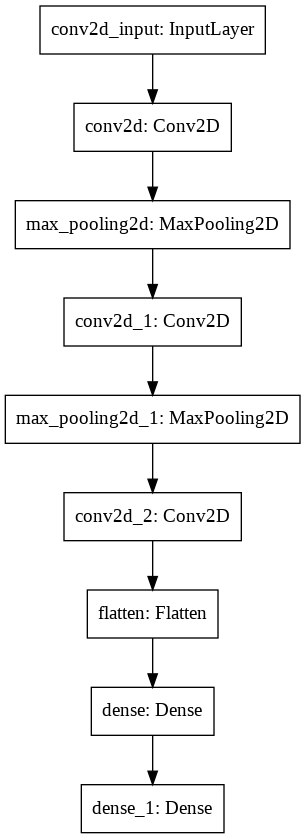

In [ ]:
# A flowchart of the model
tf.keras.utils.plot_model(model, "SIMPLE CNN.png")

In [ ]:
# Callbacks for early stopping and saving

earlystop = callbacks.EarlyStopping(
    monitor = 'val_accuracy',
    patience = 10,
    verbose = 1,
)

checkpoint = callbacks.ModelCheckpoint(
    filepath = '/content/drive/MyDrive/',
    monitor = 'val_accuracy',
    verbose = 1,
    save_best_only = True
)

In [ ]:
# Compiling the model

opt = 'adam'

model.compile(optimizer= opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train , y_train, 
                    epochs= 100, 
                    validation_split=0.2, 
                    batch_size =128, 
                    callbacks = [earlystop, checkpoint])

Epoch 1/100
313/313 [==============================] - ETA: 0s - loss: 1.7019 - accuracy: 0.3776
Epoch 00001: val_accuracy improved from -inf to 0.46170, saving model to \drive\MyDrive\simple_cnn
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: \drive\MyDrive\simple_cnn/assets
313/313 [==============================] - 3s 8ms/step - loss: 1.7019 - accuracy: 0.3776 - val_loss: 1.4776 - val_accuracy: 0.4617
Epoch 2/100
304/313 [============================>.] - ETA: 0s - loss: 1.3610 - accuracy: 0.5124
Epoch 00002: val_accuracy improved from 0.46170 to 0.53910, saving model to \drive\MyDrive\simple_cnn
INFO:tensorflow:Assets written to: \drive\MyDrive\simple_cnn/assets
313/313 [==============================] - 2s 7ms/step - loss: 1.3598 - accuracy: 0.5128 - val_loss: 1.3

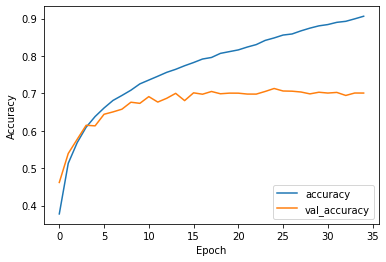

In [ ]:
# Plotting training and validation accuracy over epochs

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.savefig('simple_cnn_accuracy.png')

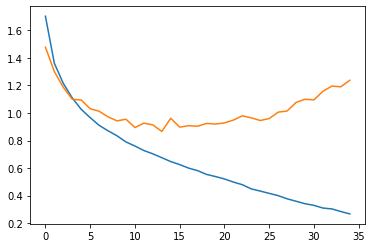

In [ ]:
# Plotting training and validation loss over epochs

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.savefig('simple_cnn_loss.png')

In [ ]:
# Testing accuracy
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.0060 - accuracy: 0.6928


[1.005994200706482, 0.692799985408783]